In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc


In [2]:
import os

print(os.getcwd())

c:\Users\dusti\Documents\ML\ML_Project\src\notebooks


In [3]:
from pathlib import Path

current_dir = Path.cwd()
data_dir = current_dir.parent / 'data' / 'processed'  
file_path = data_dir / 'Obesity_data_processed.xlsx'

df = pd.read_excel(file_path, engine='openpyxl')
print(df.head())

  Province     Sex      Marital_status      Age Working_12_months  \
0       NB  Female             Married  45 - 49               Yes   
1       BC  Female  Widow/Divorced/Sep  50 - 54               Yes   
2       ON  Female             Married  45 - 49               Yes   
3      QUE  Female          Common-law  30 - 34                No   
4      QUE  Female          Common-law  45 - 49               Yes   

                        Education_level  Perceived_life_stress Obese_or_not  \
0  Post-secondary diploma or uni degree  Quite a bit stressful    Not obese   
1  Post-secondary diploma or uni degree   Not at all stressful        Obese   
2  Post-secondary diploma or uni degree        A bit stressful    Not obese   
3  Post-secondary diploma or uni degree   Not at all stressful    Not obese   
4  Post-secondary diploma or uni degree     Not very stressful    Not obese   

         Smoker Drinker_12_months               Physical_activity  \
0    Not at all   Regular drinker  At/abo

In [4]:
print(df.columns.tolist())

['Province', 'Sex', 'Marital_status', 'Age', 'Working_12_months', 'Education_level', 'Perceived_life_stress', 'Obese_or_not', 'Smoker', 'Drinker_12_months', 'Physical_activity', 'Has_regular_healthcare_provider', 'Immigrant', 'Cultural_racial_background', 'Food_security', 'Personal_income']


In [5]:
print(df.shape)  
print(df.dtypes) 
print(df.describe()) 
print(df.isnull().sum()) 

(60920, 16)
Province                           object
Sex                                object
Marital_status                     object
Age                                object
Working_12_months                  object
Education_level                    object
Perceived_life_stress              object
Obese_or_not                       object
Smoker                             object
Drinker_12_months                  object
Physical_activity                  object
Has_regular_healthcare_provider    object
Immigrant                          object
Cultural_racial_background         object
Food_security                      object
Personal_income                    object
dtype: object
       Province     Sex Marital_status      Age Working_12_months  \
count     60920   60920          60920    60920             60920   
unique       10       2              4        9                 2   
top          ON  Female        Married  60 - 64               Yes   
freq      17703   31988   

<AxesSubplot: xlabel='Obese_or_not', ylabel='count'>

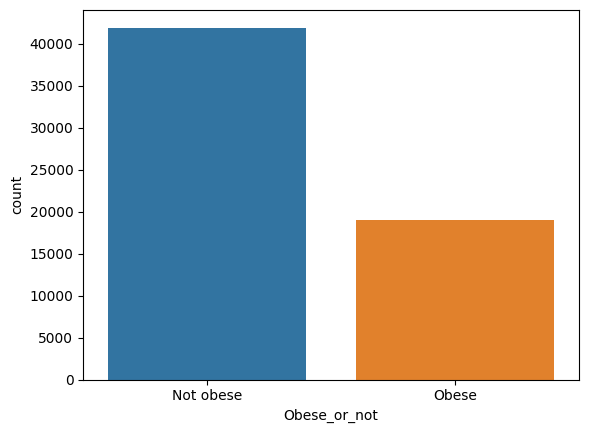

In [6]:
sns.countplot(x=df['Obese_or_not'])  

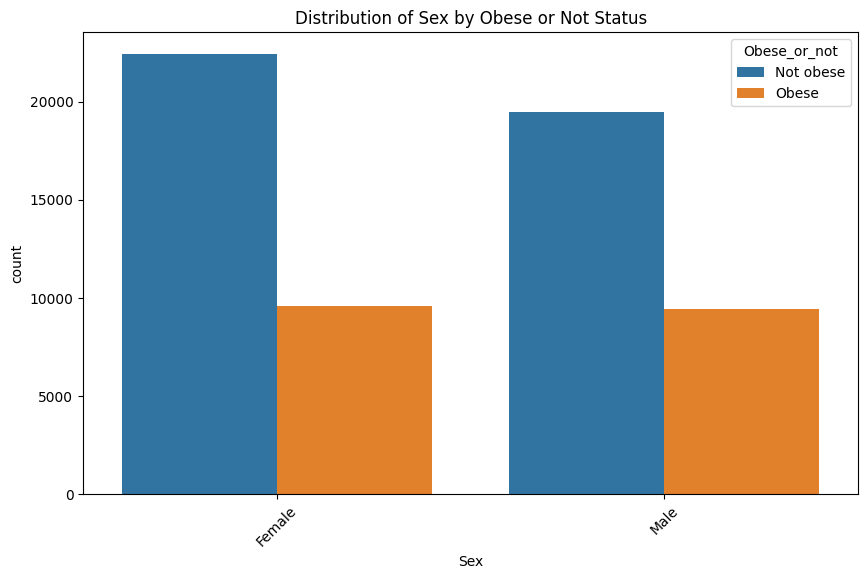

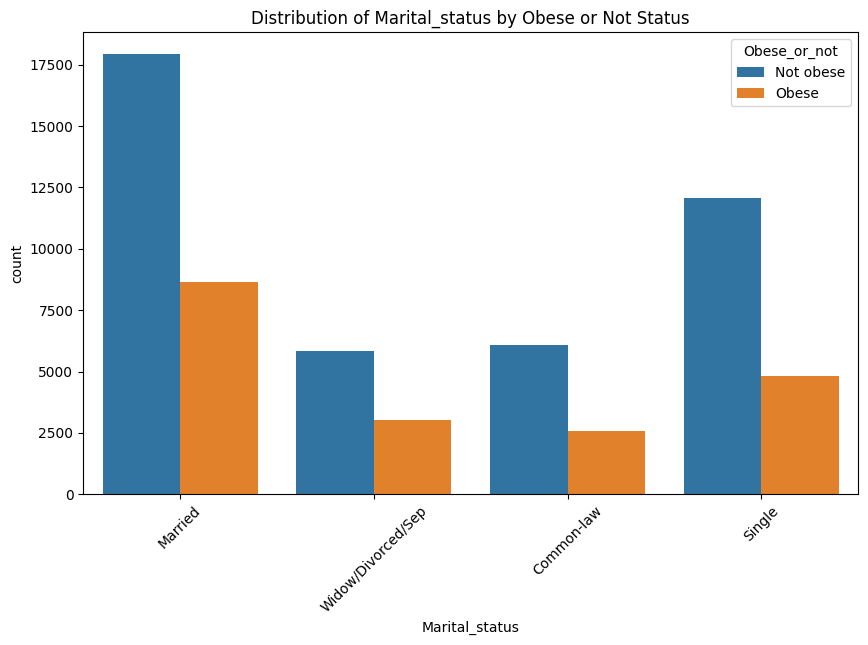

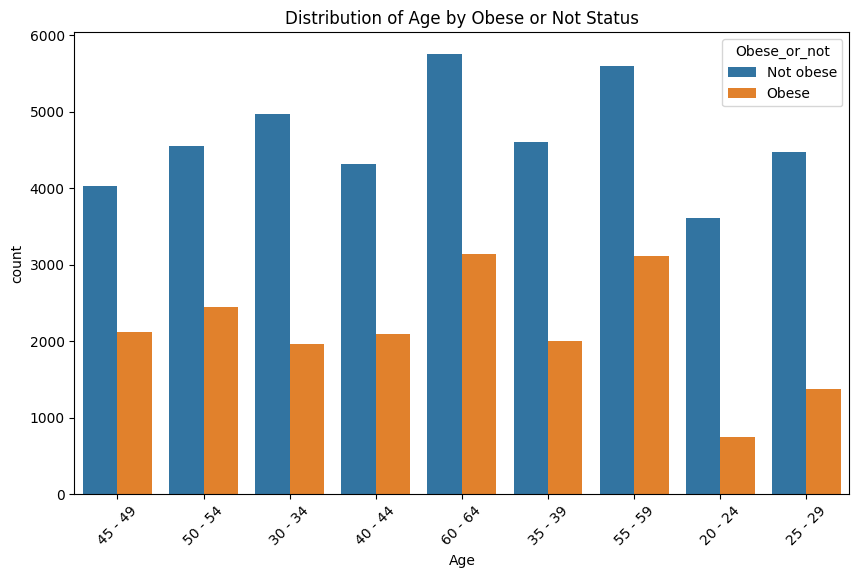

In [7]:
categorical_features = ['Sex', 'Marital_status', 'Age'] 

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Obese_or_not', data=df)
    plt.title(f'Distribution of {feature} by Obese or Not Status')
    plt.xticks(rotation=45)  
    plt.show()


In [8]:
print(df.columns.tolist())

['Province', 'Sex', 'Marital_status', 'Age', 'Working_12_months', 'Education_level', 'Perceived_life_stress', 'Obese_or_not', 'Smoker', 'Drinker_12_months', 'Physical_activity', 'Has_regular_healthcare_provider', 'Immigrant', 'Cultural_racial_background', 'Food_security', 'Personal_income']


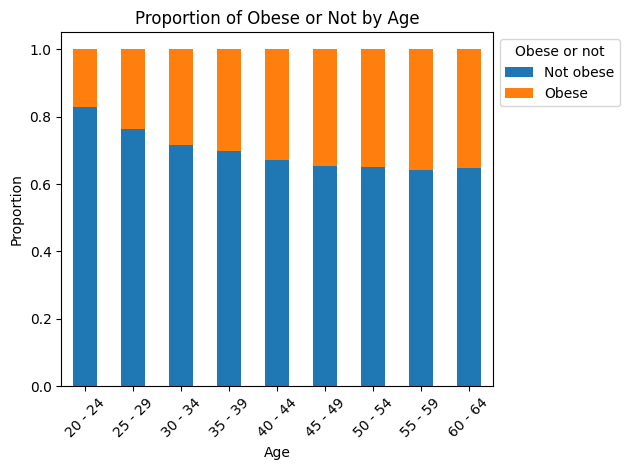

In [9]:
grouped = df.groupby('Age')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or Not by Age')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

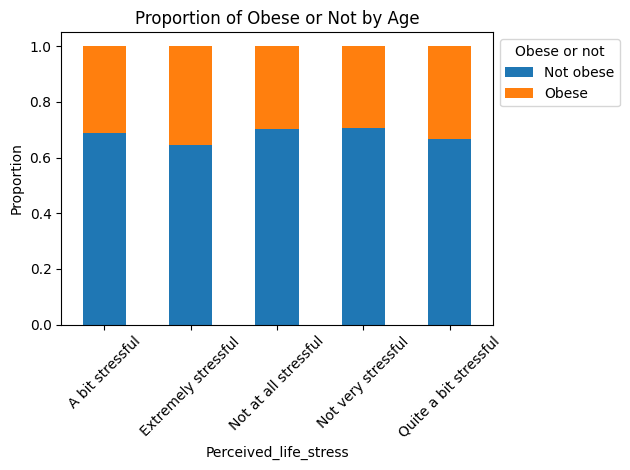

In [43]:
grouped = df.groupby('Perceived_life_stress')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or Not by Age')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

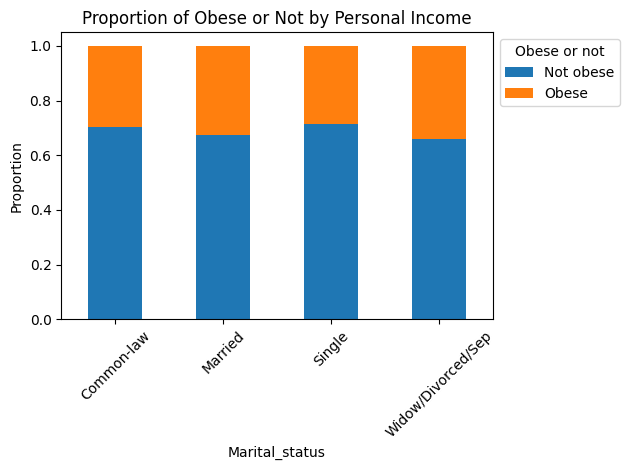

In [44]:
grouped = df.groupby('Marital_status')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or Not by Personal Income')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

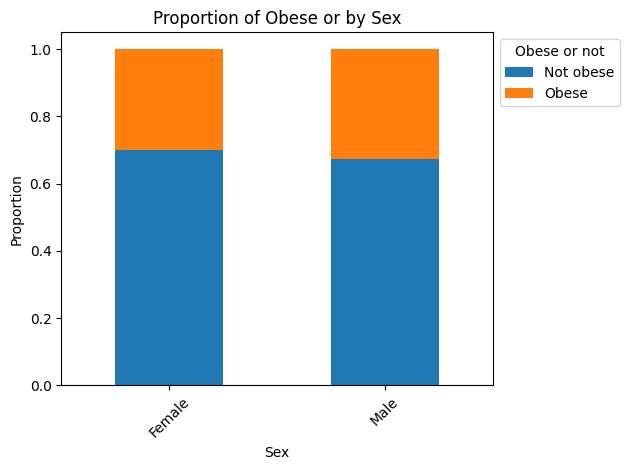

In [126]:
grouped = df.groupby('Sex')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or by Sex')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

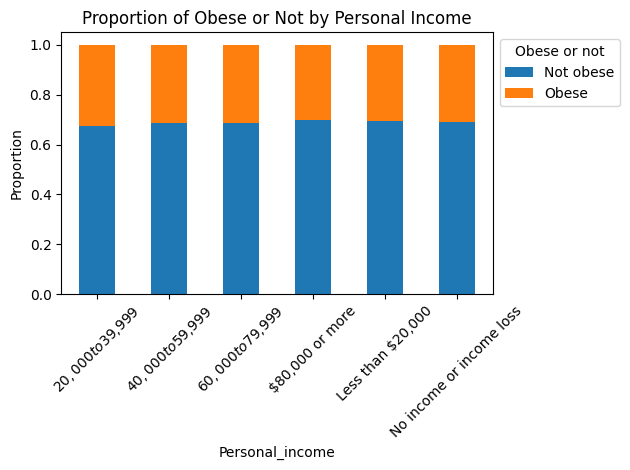

In [46]:
grouped = df.groupby('Personal_income')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or Not by Personal Income')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

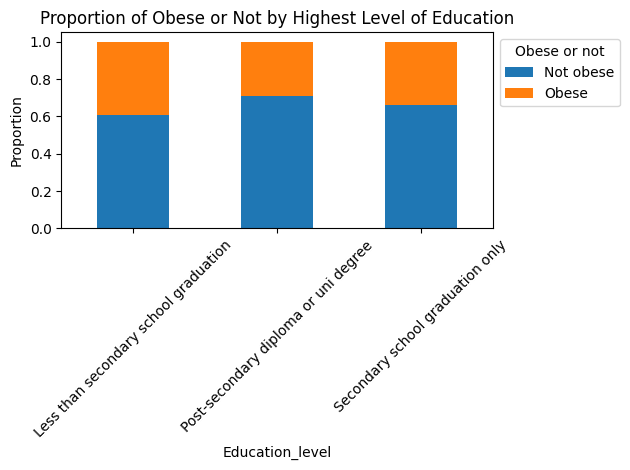

In [127]:
grouped = df.groupby('Education_level')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or Not by Highest Level of Education')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

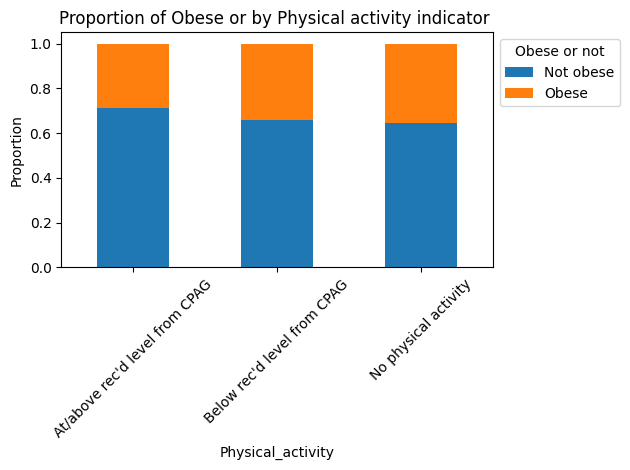

In [128]:
grouped = df.groupby('Physical_activity')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or by Physical activity indicator ')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

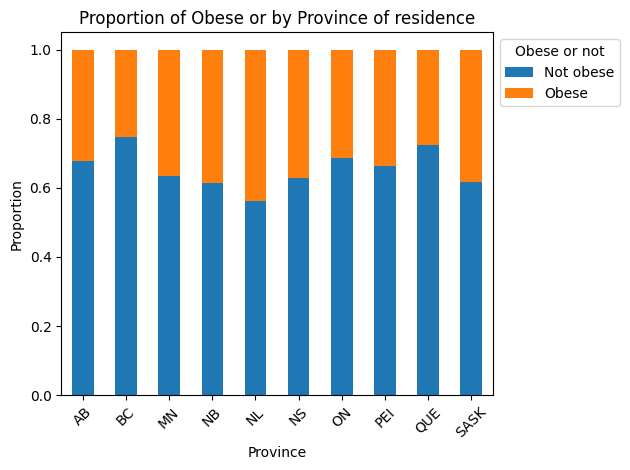

In [129]:
grouped = df.groupby('Province')['Obese_or_not'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.title('Proportion of Obese or by Province of residence')
plt.legend(title='Obese or not', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [10]:
# Separate the target variable
y = df['Obese_or_not']

# Drop the target variable from the features DataFrame
X = df.drop('Obese_or_not', axis=1)

In [11]:
print(X.columns.tolist())

['Province', 'Sex', 'Marital_status', 'Age', 'Working_12_months', 'Education_level', 'Perceived_life_stress', 'Smoker', 'Drinker_12_months', 'Physical_activity', 'Has_regular_healthcare_provider', 'Immigrant', 'Cultural_racial_background', 'Food_security', 'Personal_income']


In [12]:
print(df['Province'].unique())

['NB' 'BC' 'ON' 'QUE' 'MN' 'AB' 'NL' 'PEI' 'NS' 'SASK']


In [18]:
ordinal_features = ['Province', 'Sex', 'Marital_status', 'Age', 'Working_12_months', 'Education_level', 
                    'Perceived_life_stress', 'Smoker', 'Drinker_12_months', 'Physical_activity', 
                    'Has_regular_healthcare_provider', 'Immigrant', 'Cultural_racial_background', 
                    'Food_security', 'Personal_income']

In [19]:
feature_orders = {
    'Province': ['NB', 'BC', 'ON', 'QUE', 'MN', 'AB', 'NL', 'PEI', 'NS', 'SASK'],
    "Sex": ["Female", "Male"],
    'Marital_status': ['Single', 'Common-law', 'Widow/Divorced/Sep', 'Married'],
    'Age': ['25 - 29', '20 - 24', '55 - 59', '35 - 39', '60 - 64', '40 - 44', '30 - 34', '50 - 54', '45 - 49'],
    'Working_12_months': ['Yes', 'No'],
    'Education_level': ['Less than secondary school graduation', 'Secondary school graduation only', 'Post-secondary diploma or uni degree'],
    'Perceived_life_stress': ['Not at all stressful', 'Not very stressful', 'A bit stressful', 'Quite a bit stressful', 'Extremely stressful'],
    'Smoker': ['Not at all', 'Occasionally', 'Daily'],
    'Drinker_12_months': ['Did not drink in the last 12 months', 'Occasional drinker', 'Regular drinker'],
    'Physical_activity': ["At/above rec'd level from CPAG", "Below rec'd level from CPAG", 'No physical activity'],
    'Has_regular_healthcare_provider': ['Yes', 'No'],
    'Immigrant': ['Immigrant', 'Canadian born'],
    'Cultural_racial_background': ['White', 'Non-white (other visible minority)', 'Aboriginal'],
    'Food_security': ['Food secure', 'Moderately food insecure', 'Severely food insecure'],
    'Personal_income': ['No income or income loss', 'Less than $20,000', '$20,000 - $39,999', '$40,000 - $59,999', '$60,000 - $79,999', '$80,000 or more']
}

X_ordinal = pd.DataFrame(df[ordinal_features])

# Correctly extracting the order of categories for each feature from the dictionary
categories_order = [feature_orders[feature] for feature in ordinal_features]

encoder = OrdinalEncoder(categories=categories_order)
X_ordinal_encoded = encoder.fit_transform(X_ordinal)
X_ordinal_encoded_df = pd.DataFrame(X_ordinal_encoded, columns=[f'{feat}_encoded' for feat in ordinal_features])

X_ordinal_encoded_df.head()

,Province_encoded,Sex_encoded,Marital_status_encoded,Age_encoded,Working_12_months_encoded,Education_level_encoded,Perceived_life_stress_encoded,Smoker_encoded,Drinker_12_months_encoded,Physical_activity_encoded,Has_regular_healthcare_provider_encoded,Immigrant_encoded,Cultural_racial_background_encoded,Food_security_encoded,Personal_income_encoded
0,0.0,0.0,3.0,8.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.0,0.0,2.0,7.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0
2,2.0,0.0,3.0,8.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0
3,3.0,0.0,1.0,6.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,5.0
4,3.0,0.0,1.0,8.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0


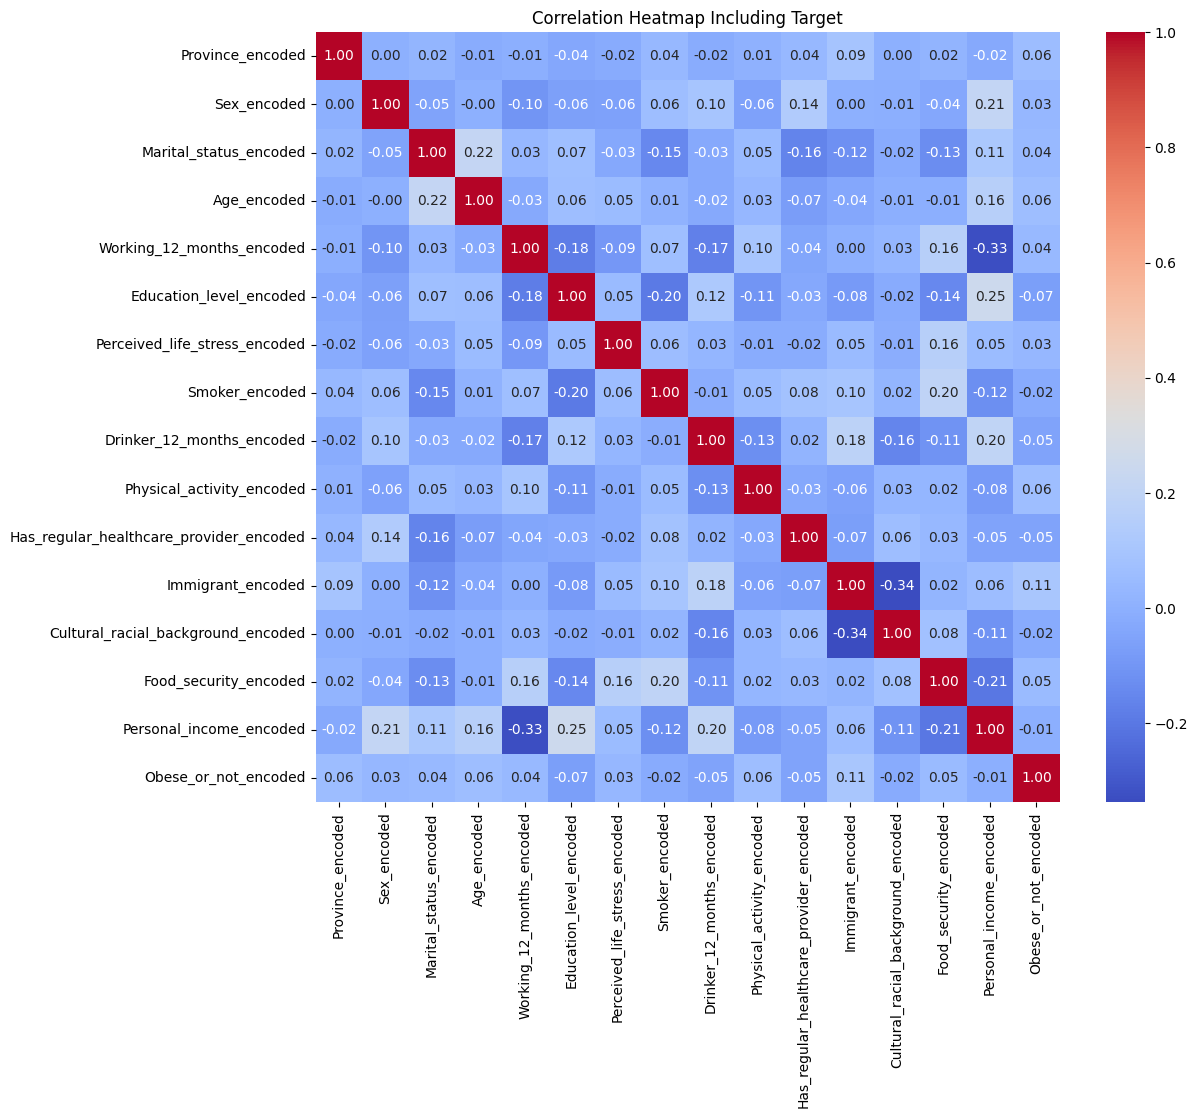

In [17]:
# HEATMAP WITH TARGET INCLUDED
target_encoding = {'Obese': 1, 'Not obese': 0}
df['Obese_or_not_encoded'] = df['Obese_or_not'].map(target_encoding)

# Assuming 'X_ordinal_encoded_df' is your DataFrame with encoded features
# Rename the DataFrame to reflect it includes both features and target
encoded_features_target_df = X_ordinal_encoded_df.copy()
encoded_features_target_df['Obese_or_not_encoded'] = df['Obese_or_not_encoded']

# Now 'encoded_features_target_df' contains all features plus the encoded target variable

correlation_matrix = encoded_features_target_df.corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Heatmap Including Target')
plt.show()

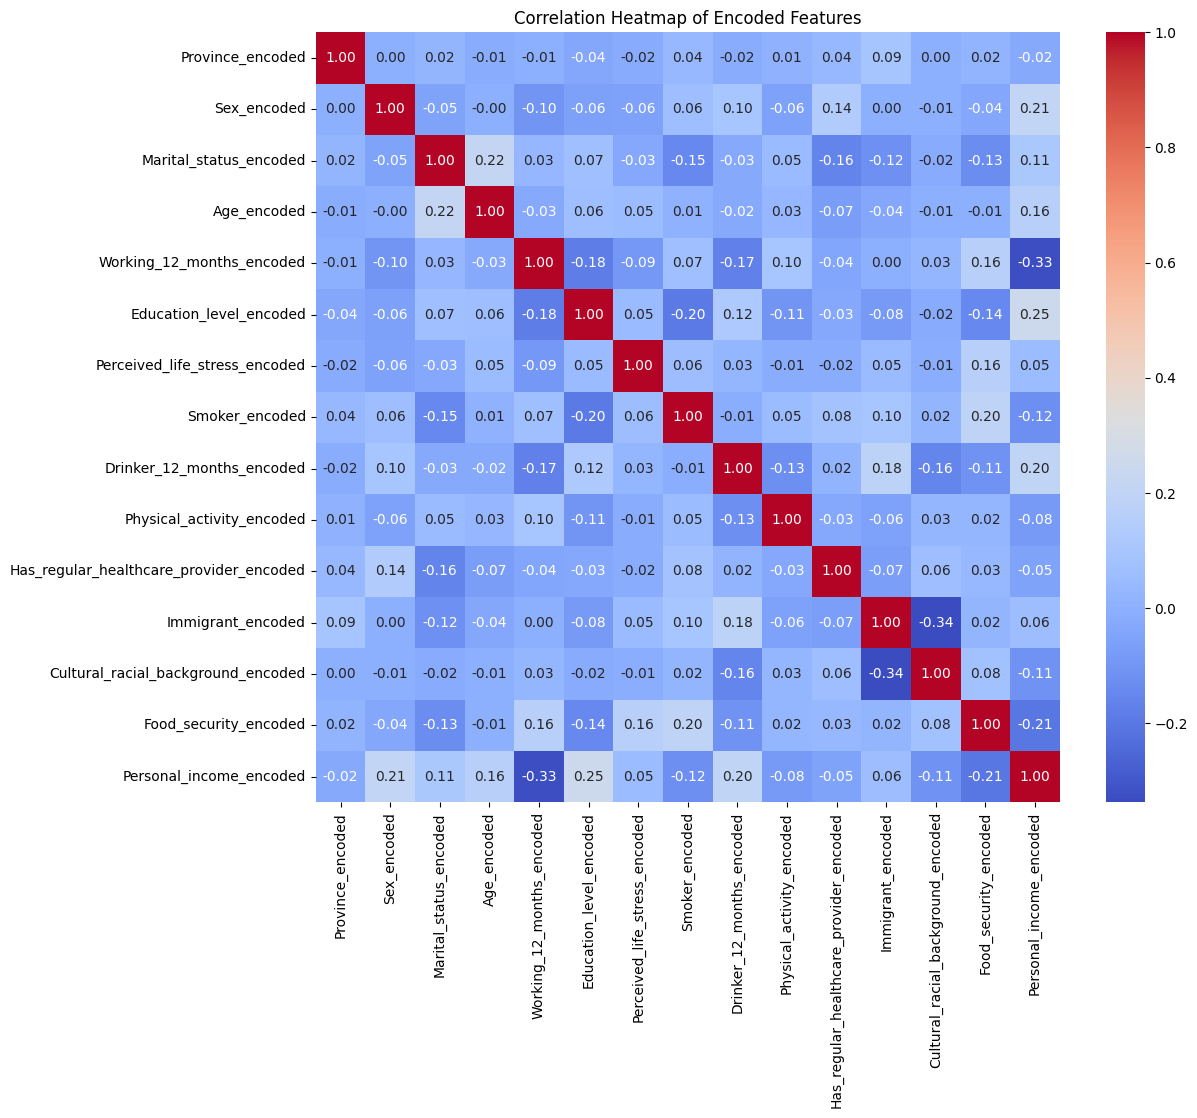

In [15]:
#Heatmap without Target
correlation_matrix = X_ordinal_encoded_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

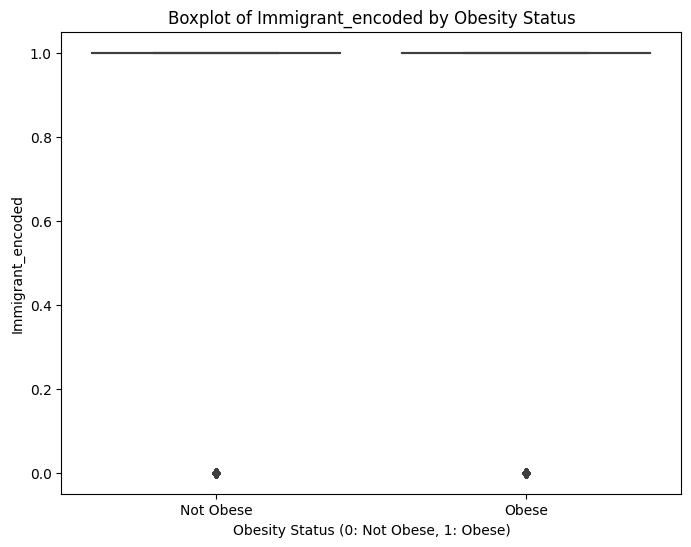

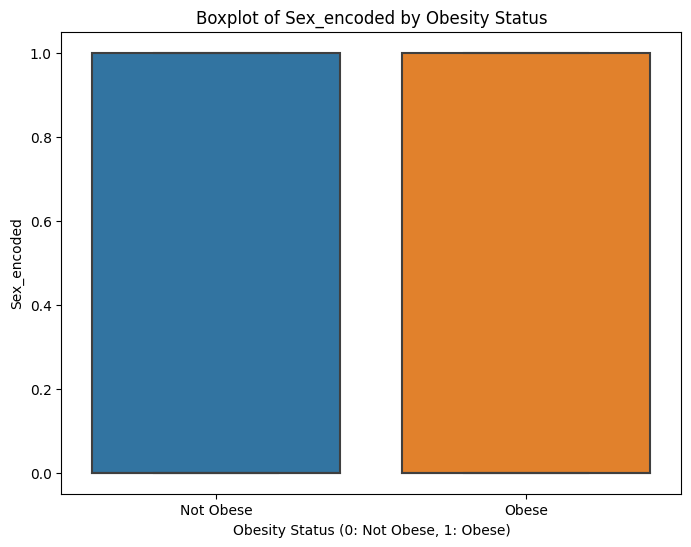

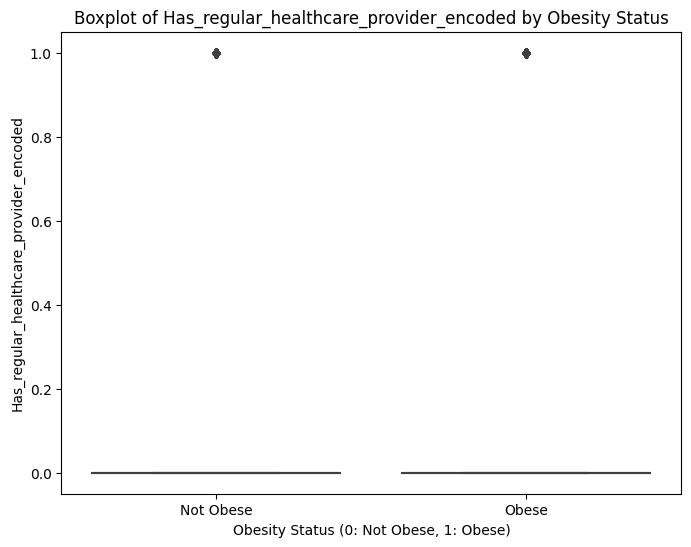

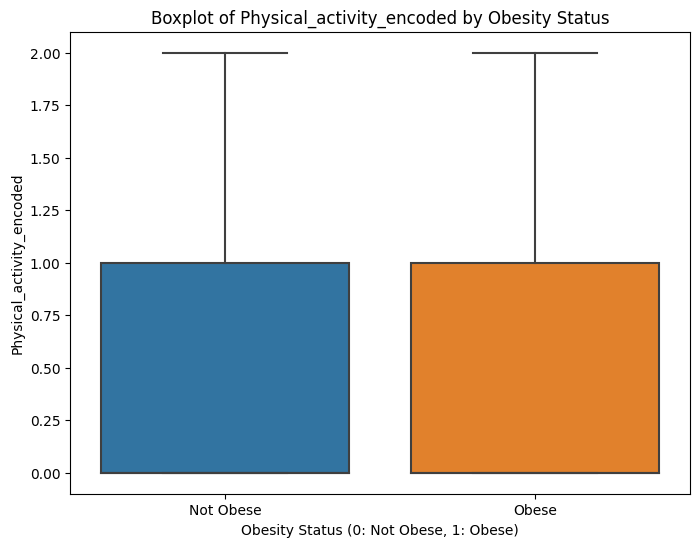

In [20]:
features_of_interest = ['Immigrant_encoded', 'Sex_encoded', 'Has_regular_healthcare_provider_encoded', 'Physical_activity_encoded']

# Target variable name for clarity
target_variable = 'Obese_or_not_encoded'

# Loop through the features of interest and create a boxplot for each
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y=feature, data=encoded_features_target_df)
    plt.title(f'Boxplot of {feature} by Obesity Status')
    plt.xlabel('Obesity Status (0: Not Obese, 1: Obese)')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Not Obese', 'Obese'])  # Optional: Makes it clearer
    plt.show()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_ordinal_encoded_df, y, test_size=0.2, random_state=42)

In [148]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [152]:
# First attempt
y_pred = model.predict(X_test)

# classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Obese'))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6886080105055811
Precision: 0.554140127388535
Recall: 0.045454545454545456
F1 Score: 0.08401738290680831

Confusion Matrix:
 [[8216  140]
 [3654  174]]

Classification Report:
               precision    recall  f1-score   support

   Not obese       0.69      0.98      0.81      8356
       Obese       0.55      0.05      0.08      3828

    accuracy                           0.69     12184
   macro avg       0.62      0.51      0.45     12184
weighted avg       0.65      0.69      0.58     12184



In [154]:
# SECOND ATTEMPT 
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Obese'))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5807616546290216
Precision: 0.39163562478835084
Recall: 0.60423197492163
F1 Score: 0.4752414218204233

Confusion Matrix:
 [[4763 3593]
 [1515 2313]]

Classification Report:
               precision    recall  f1-score   support

   Not obese       0.76      0.57      0.65      8356
       Obese       0.39      0.60      0.48      3828

    accuracy                           0.58     12184
   macro avg       0.58      0.59      0.56     12184
weighted avg       0.64      0.58      0.60     12184



Evaluation Metrics Comparison between the First and Second Attempt:

Accuracy: Decreased from 68.9% to 58.1%. This is expected as the model now focuses more on classifying the minority class (obesity) correctly, which can lead to a higher number of false positives for the majority class, reducing overall accuracy.

Precision: Decreased slightly from 55.4% to 39.2%. The model is now identifying more True Positives for 'Obese' class, but at the cost of also increasing the number of false positives, leading to lower precision.

Recall: Significantly increased from 4.5% to 60.4%. This indicates that the model is now much better at identifying 'Obese' instances.

F1 Score: Improved from 8.4% to 47.5%. The F1 score balances precision and recall, and this improvement suggests a better balance between these two metrics for the 'Obese' class.

By adjusting the class weights to 'balanced', the model now better identifies the 'Obese' class but at the cost of misclassifying more 'Not obese' instances as 'Obese'.

In [156]:
# Third Attempt: Adjusting Weights Manually
# Increasing the weight of the 'Obese' class
weights = {'Not obese': 1, 'Obese': 2}

model = LogisticRegression(class_weight=weights, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Obese'))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6122783978988838
Precision: 0.4056842105263158
Recall: 0.5033960292580982
F1 Score: 0.4492888785264631

Confusion Matrix:
 [[5533 2823]
 [1901 1927]]

Classification Report:
               precision    recall  f1-score   support

   Not obese       0.74      0.66      0.70      8356
       Obese       0.41      0.50      0.45      3828

    accuracy                           0.61     12184
   macro avg       0.57      0.58      0.58     12184
weighted avg       0.64      0.61      0.62     12184



In [181]:
# Fourth Attempt: Adjusting Weights Manually
# Increasing the weight of the 'Obese' class
weights = {'Not obese': 1, 'Obese': 2.1}

model = LogisticRegression(class_weight=weights, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Obese'))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.599064346684176
Precision: 0.4003770028275212
Recall: 0.554858934169279
F1 Score: 0.4651264644695062

Confusion Matrix:
 [[5175 3181]
 [1704 2124]]

Classification Report:
               precision    recall  f1-score   support

   Not obese       0.75      0.62      0.68      8356
       Obese       0.40      0.55      0.47      3828

    accuracy                           0.60     12184
   macro avg       0.58      0.59      0.57     12184
weighted avg       0.64      0.60      0.61     12184



In [173]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Perform cross-validation
scores = cross_val_score(model, X_ordinal_encoded_df, y, cv=5, scoring='accuracy')  # Example for accuracy

# Print the average accuracy
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.5788739330269206


In [177]:
# Custom F1 score where 'Obese' is positive class
f1_scorer = make_scorer(f1_score, pos_label='Obese')
f1_scores = cross_val_score(model, X_ordinal_encoded_df, y, cv=5, scoring=f1_scorer)
print("Average F1 Score:", f1_scores.mean())

Average F1 Score: 0.47312018797431543


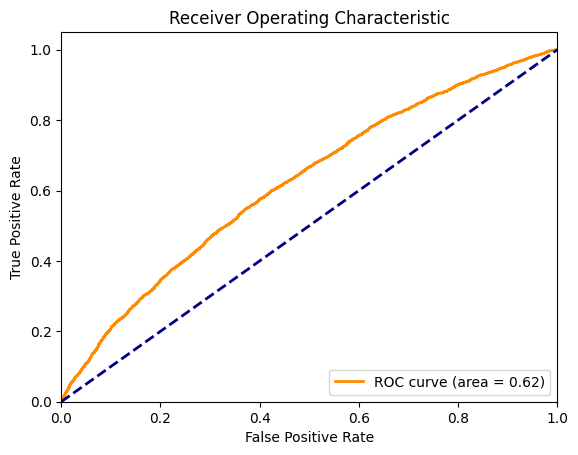

In [182]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Obese')  # Adjust pos_label as necessary
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [183]:
# Finding coefficients values of Features to eliminate to improve Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                                    Feature  Coefficient  Absolute Coefficient
11                        Immigrant_encoded     0.778332              0.778332
1                               Sex_encoded     0.240157              0.240157
10  Has_regular_healthcare_provider_encoded    -0.214542              0.214542
13                    Food_security_encoded     0.165697              0.165697
8                 Drinker_12_months_encoded    -0.164249              0.164249
5                   Education_level_encoded    -0.162767              0.162767
7                            Smoker_encoded    -0.158410              0.158410
9                 Physical_activity_encoded     0.147101              0.147101
4                 Working_12_months_encoded     0.144532              0.144532
6             Perceived_life_stress_encoded     0.071450              0.071450
2                    Marital_status_encoded     0.062338              0.062338
3                               Age_encoded     0.05

## Turn into Graph, do this for each Model to visualize feature importance changing depending on Model being used:

Top Influencers: The feature Immigrant_encoded has the highest absolute coefficient, indicating it has the most significant impact on the model's output. Positive coefficients like for Immigrant_encoded and Sex_encoded increase the log odds of the positive class (assuming 'Obese'), while negative coefficients like for Has_regular_healthcare_provider_encoded decrease the log odds.

Lowest Influencers: At the bottom of the list, Personal_income_encoded has the smallest absolute coefficient, suggesting it has the least influence on the model's predictions.

In [197]:
# Dropping features
columns_to_drop = ['Personal_income_encoded', 'Cultural_racial_background_encoded', 'Province_encoded', 'Age_encoded', 
                   'Marital_status_encoded', 'Perceived_life_stress_encoded']

X_ordinal_encoded_df_updated = X_ordinal_encoded_df.drop(columns_to_drop, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_ordinal_encoded_df, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [198]:
weights = {'Not obese': 1, 'Obese': 2.1}
model = LogisticRegression(class_weight=weights, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Obese'))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.599064346684176
Precision: 0.4003770028275212
Recall: 0.554858934169279
F1 Score: 0.4651264644695062

Confusion Matrix:
 [[5175 3181]
 [1704 2124]]

Classification Report:
               precision    recall  f1-score   support

   Not obese       0.75      0.62      0.68      8356
       Obese       0.40      0.55      0.47      3828

    accuracy                           0.60     12184
   macro avg       0.58      0.59      0.57     12184
weighted avg       0.64      0.60      0.61     12184



## Result: 
Taking away the least important Features does not make much of a difference at all in the Metrics. This suggests those features taken out were not contributing critical information for the model's decision-making process